In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import GridSpec
%matplotlib inline


The purpose of this visualization project is to look into the number of endangered languages in the world, their endangerment levels and distribution across countries. This dataset was published in the Datablog by The Guardian in 2011. They categorize the levels of endangerment by the following classification system provided by UNESCO:

**Vulnerable** - most children speak the language, but it may be restricted to certain domains (e.g., home). These languages are highly coded in diglossic situations

**Definitely endangered** - children no longer learn the language as a 'mother tongue' or first language in the home. The interruption of intergenerational transmission has started. 

**Severely endangered** - language is spoken by grandparents and older generations; while the parent generation may understand it, they do not speak it to children or among themselves. At this stage, the language will be considered moribund as per the EGIDS scale. 

**Critically endangered** - the youngest speakers are grandparents and older, and they speak the language partially and infrequently

**Extinct** - there are no speakers left

In the following visualizations I looked into the distribution of the endangerment levels and speakers in top 20 countries with most number of unique endangered languages. Some languages have been attributed to multiple countries and I have not counted those.



In [39]:
df = pd.read_csv('data.csv') #loading data
#print(df.head()) 
df.shape # 2722 rows and 15 columns 
#data published originally at the Guardian Apr 15, 2011

(2722, 15)

In [40]:
#Data preparation 
#deleting repeated and unwanted columns 

df = df.drop(['Name in the language','Name in French', 'Name in Spanish', 'ISO639-3 codes','Sources', 'Description of the location'], axis=1)
df.shape #2722,9

#renaming column names for accessibility 

df.rename(columns={'Number of speakers': 'Speakers',
                   'Country code': 'Country_code',
                   'Degree of endangerment': 'Endangerment',
                   'Name in English':'Language',
                  'Country codes alpha 3':'Country code'}, inplace=True)



In [41]:
# Data cleaning 


#Replacing NaNs and floats in the "Speakers" column
df['Speakers'] = df['Speakers'].fillna(df["Speakers"].min()).astype(int)


#replacing categorical values in the "Endangerment" column to numerical ones
print(df.Endangerment.head())

labels = ['Vulnerable' ,'Definitely endangered' , 'Severely endangered', 'Critically endangered', 'Extinct']
label_to_enc = {'Vulnerable':0 ,'Definitely endangered':1 , 'Severely endangered':2, 
                'Critically endangered':3, 'Extinct':4}
enc_to_label = {value: key for key, value in label_to_enc.items()}
#print(enc_to_label)

#Creating a new column with encoded endagerment levels
df['Endangerment_enc'] = df.Endangerment.map(label_to_enc)


0               Vulnerable
1               Vulnerable
2               Vulnerable
3               Vulnerable
4    Definitely endangered
Name: Endangerment, dtype: object


### 1. Top 20 countries with most number of endangered languages

In this horizontal barplot I have shown top 20 countries that have the most number of endangered languages. The United States of America is the topmost country as there are many endangered Native American languages which are dying at a rapid pace. Brazil is the second in the list again for the Amazonian languages that are dying at a rapid rate. 



Text(0.5,0,'Endangered languages')

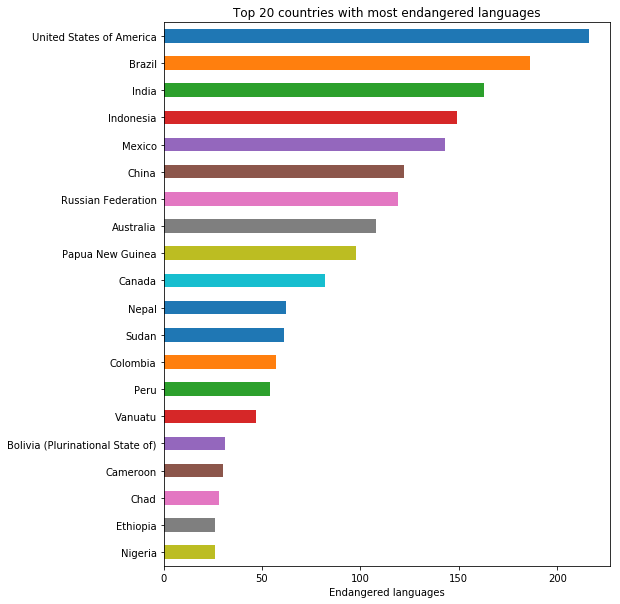

In [42]:
#Top 20 countries with most number of endangered languages 
top_countries = df[['Countries','Speakers']].groupby(['Countries'])['Speakers'].size().nlargest(20)

fig, ax = plt.subplots()

ax = top_countries.plot(kind='barh', figsize=(8, 10), 
            title='Top 20 countries with most endangered languages')
ax.set_ylabel('', visible=False)
ax.tick_params(direction='out')
ax.invert_yaxis()
#ax.barh(y_pos, top_countries.values,  align='center', color='green', ecolor='black')
ax.set_xlabel('Endangered languages')
#plt.show()


### 2. Looking into the distribution of different levels of endangerment in the top 5 countries. 

Next, I want to look into the levels of endangerment and the number of speakers in each level to assess which  stage these countries are in the process of endangerment. The follosing bar charts shows the average number of speakers in each level of endangement in top five countries. These countries are: 'United States of America', 'Brazil', 'India', 'Indonesia', 'Mexico'. 

United States has the maximum number of speakers in the "Critically endangered" category. These speakers are grandparents and older, and they speak the language partially and infrequently. The endangerment is at the most advanced stage as these languages will die with the older speakers. And there is relatively less chance of language revitalization. 

Brazil and India, on the other hand, have started the endangerment process, as evident from the maximum number of "Vulnerable" speakers. This means that there's a trend, and the speakers only speak the language(s) at home or while speaking to the elders. Since these languages have been highly codified in diglossic situations, they will soon be transformed to the "Definitely endangered" category as the younger generation will cease to learn these languages. 



In [43]:
def country_endanger_count(df, countrycode):
    name = df[df['Country code'] == countrycode][['Speakers', 'Endangerment_enc']].groupby('Endangerment_enc').count()
    return name

df_USA = country_endanger_count(df, 'USA')
df_BRA = country_endanger_count(df, 'BRA')
df_IND = country_endanger_count(df, 'IND')
df_IDN = country_endanger_count(df, 'IDN')
df_MEX = country_endanger_count(df, 'MEX')

def make_barplot(df, country_name):
    plt.barh(range(len(df)), df.Speakers.values)#, bottom=True)
    plt.ylabel('Speakers in thousands')
    plt.title('Speakers of different endangerment levels in {}')
    plt.yticks(df.index, labels, rotation=40)
    #plt.xticks('G1', 'G2', 'G3', 'G4', 'G5')
    #plt.yticks(np.arange(0, 81, 10))
    #plt.legend((p1[0], p2[0], p3[0]), ('USA', 'India', 'Canada'))
    plt.title(' Languages in ' +  str(country_name))

    plt.show()

    
    

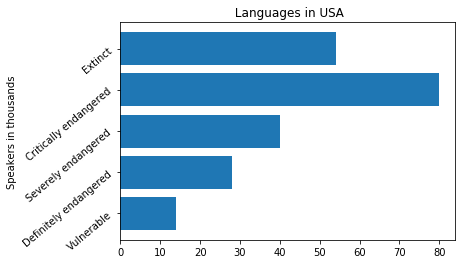

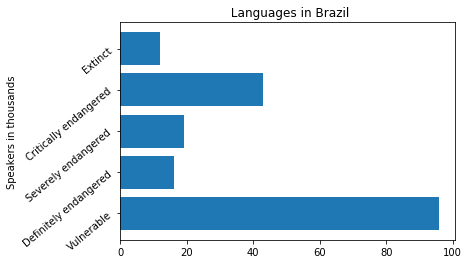

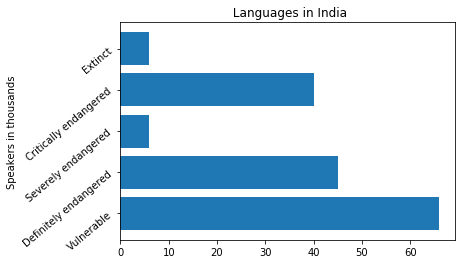

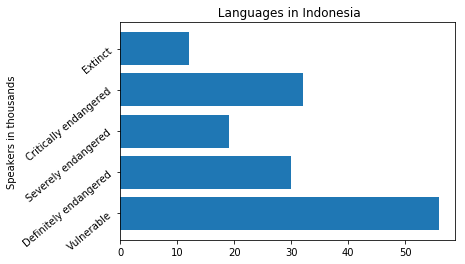

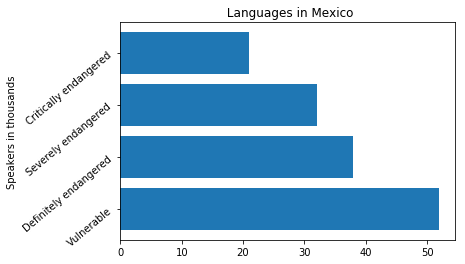

In [44]:
make_barplot(df_USA, "USA")
make_barplot(df_BRA, "Brazil")
make_barplot(df_IND, "India")
make_barplot(df_IDN, "Indonesia")
make_barplot(df_MEX, "Mexico")

In [45]:
top_5_countries = top_countries.index[:5].tolist()  #.tolist changes index object to list

In [46]:
top_5_countries

['United States of America', 'Brazil', 'India', 'Indonesia', 'Mexico']

In [47]:
# creating a df of country names and country codes 

top_5_df = pd.DataFrame({'c_name': top_5_countries, 
                         'c_code': df[['Endangerment','Countries', 'Country code']]['Country code'].value_counts().index[:5]})

### 3. But, what % of speakers speak these languages? 

In the following pie-charts I show the distribution of these languages and percentage of speakers associated with them. A lower % of speakers implies that we have risk of the language sooner.


In [48]:
#Number of languages in each category of endangerment levels in the dataset
df.Endangerment.value_counts()

#df.Endangerment[df.Countries == "United States of America"].value_counts().sum()
df.Endangerment[df.Countries == "Brazil"].value_counts()

Vulnerable               96
Critically endangered    43
Severely endangered      19
Definitely endangered    16
Extinct                  12
Name: Endangerment, dtype: int64

In [49]:
country_group = df.groupby('Country code')

def get_percent(df, name):  
    country_endanger_groups = country_group.get_group(name).groupby('Endangerment')
    df_percent_lgs = country_endanger_groups['Language'].count()/ country_endanger_groups['Language'].count().sum()
    #df_percent_lgs = country_endanger_groups.count() / country_endanger_groups.count().sum()
    df_speaker_sum = country_endanger_groups.sum().Speakers 
    df_percent_speaker = country_endanger_groups.sum().Speakers / country_endanger_groups.sum().Speakers.sum()
    return df_percent_lgs, df_percent_speaker, df_speaker_sum
    
USA_speakers_pop = get_percent(df, 'USA')
Brazil_speakers_pop = get_percent(df, 'BRA')
India_speakers_pop = get_percent(df, 'IND')
Indonesia_speakers_pop = get_percent(df, 'IDN')
Mexico_speakers_pop = get_percent(df, 'MEX')
Mexico_speakers_pop.index

<function tuple.index>

I observed that Mexico doesn't have a number for the extinct languages in the dataset. This could be for several reasons, for example, the documentation process might have started after the last speakers have died or we may have just the names of the languages on paper, but we cannot trace it back to a location or group. Assuming that the extinct languages will have no speakers left, I add the number to the dataframe for plotting purposes. 



In [50]:
#Adding a value ('extinct': 0) to the series for mexico
obj = list(Mexico_speakers_pop)
p = pd.Series({'Extinct': 0})
obj1 = [x.append(p) for x in obj]

new_mex_series = obj1[0]
new_mex_series.sort_index()

Critically endangered    0.146853
Definitely endangered    0.265734
Extinct                  0.000000
Severely endangered      0.223776
Vulnerable               0.363636
dtype: float64

The charts for USA show that 37% of the languages are critically endangered, and they are spoken by only 2% of the speakers. This shows us the grave situation that we are on the verge of losing these languages, and probably too soon (and the history, culture and knowledge associated with these languages). Native American languages provide many unique perspectives towards the world. Some mundane objects (trees, the moon) have life (animate) whereas stones and the sun do not have life (inanimate), and have structured explanations of such categorization on the basis of observed knowledge. They have allocentric direction (as opposed to egocentric, e.g., left of me is right of you) directions. These follow the natural reference points such as "up the river" or "across the river" and allows us to take a new look into how our cognitive experience interact with our linguistic expressions. 

It is even more severe in Brazil as 23% of the languages are critically endangered and have 0-1% speakers left. This tells us that we will never be able to learn how the Amazonian speakers thought and what unique experience they had. Some of these languages (Pirahã for example) are known to have no or very basic counting system, or only three vowels. It'd have been interesting to explore how this knowledge :-( 

In [51]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#9999ff']
def make_pie(df_lgs, df_speaker, country_name, plt_legend=False):
    fig, ax = plt.subplots(figsize=(14, 5), subplot_kw=dict(aspect="equal"))
    the_grid = GridSpec(1, 2)
    
    plt.subplot(the_grid[0, 0], aspect=1)  #Left plot - % languages as per endangerment levels
   # plt.pie(name[1],  labels=name[1].index, autopct='%d%%', colors=colors)
    plt.pie(df_lgs,  autopct='%d%%', colors=colors, startangle=90)
    plt.gca().set_title('% Endangered Languages')
    
    plt.subplot(the_grid[0, 1], aspect=1)   #Right plot - % speakers in each endangerment level
    plt.pie(df_speaker, autopct='%d%%', colors=colors, startangle=90)
    plt.gca().set_title('% Speakers in Endangered Languages')
    
    if plt_legend:
        plt.legend(labels=df_lgs.index, prop={'size': 15}, loc=0, bbox_to_anchor=(1.5,1))
    
    plt.suptitle(' Languages in ' +  str(country_name), fontsize=14)    
    plt.show()


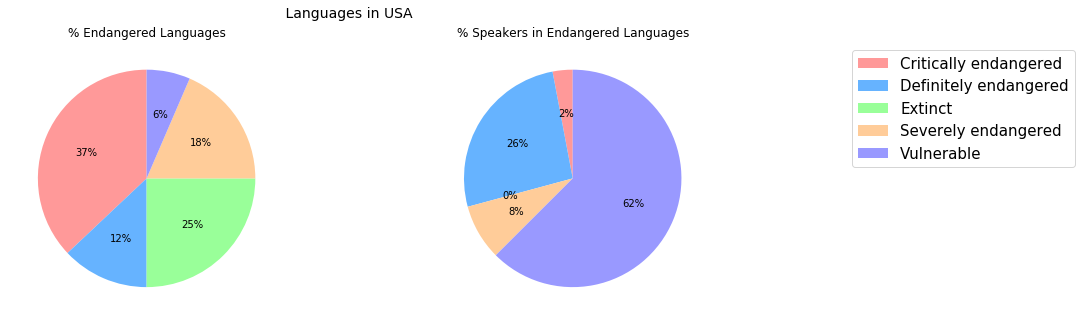

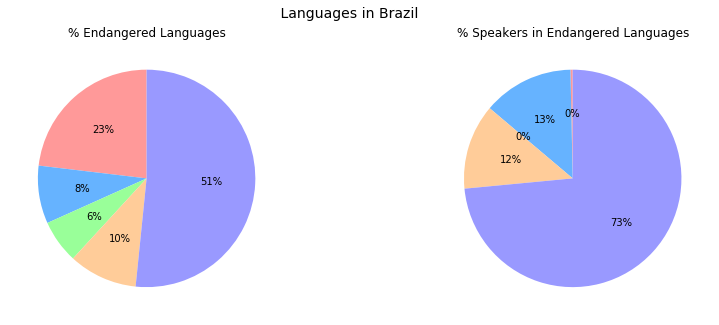

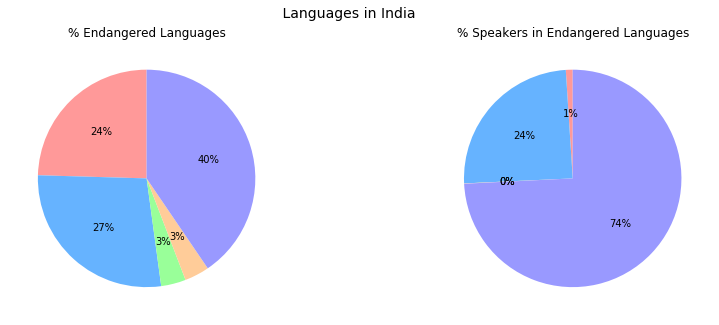

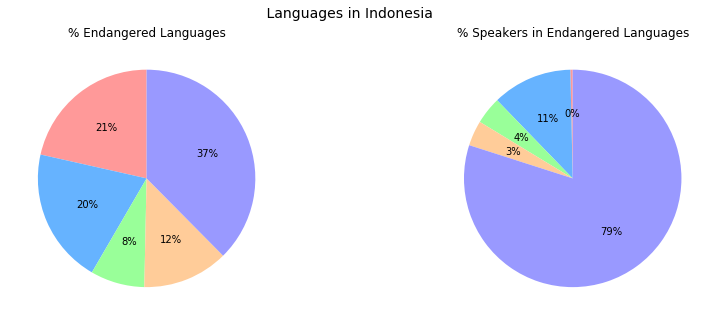

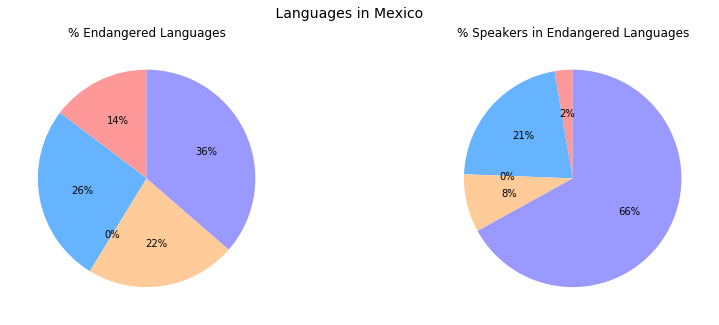

In [52]:
make_pie(USA_speakers_pop[0], USA_speakers_pop[1], "USA", True)
make_pie(Brazil_speakers_pop[0], Brazil_speakers_pop[1], "Brazil", False)
make_pie(India_speakers_pop[0], India_speakers_pop[1], "India", False)
make_pie(Indonesia_speakers_pop[0], Indonesia_speakers_pop[1], "Indonesia", False)
#make_pie(Mexico_speakers_pop[0], Mexico_speakers_pop[1], "Mexico", False)
make_pie(obj1[0].sort_index(), obj1[1].sort_index(), "Mexico", False)


### Checking the range of speakers for each level. 

The following boxplots are to confirm that the numbers we are dealing with are not just due to some outliers. Although the plots are not perfect, it confirms that the range of speakers for each endangerment level have relatively trustworthy ranges. 


In [53]:
usa = df[df.Countries == "United States of America"]
Brazil = df[df.Countries == "Brazil"]
India = df[df.Countries == "India"]
Indonesia = df[df.Countries == "Indonesia"]
Mexico = df[df.Countries == "Mexico"]


In [54]:
usa.Endangerment[usa.Endangerment.index].value_counts()
usa.Endangerment[usa.Endangerment == "Definitely endangered"].value_counts()

Definitely endangered    28
Name: Endangerment, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([<matplotlib.axis.XTick at 0x1082b3a90>,
 <a list of 6 Text xticklabel objects>)

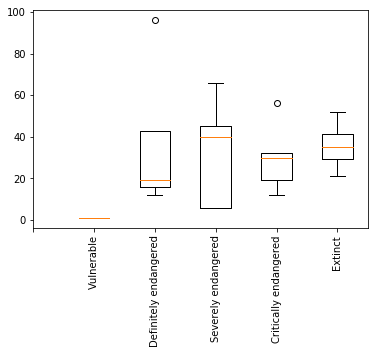

In [55]:
plt.boxplot([usa.Endangerment.index.value_counts(), 
            Brazil.Endangerment.value_counts(), 
            India.Endangerment.value_counts(),
            Indonesia.Endangerment.value_counts(),
            Mexico.Endangerment.value_counts()])
plt.xticks(range(6), ['']+labels, rotation=90)



In [56]:
def country_speaker_range(df, country_name):
    df_country = df[df.Countries == country_name]
    g = df_country.groupby('Endangerment_enc')
    m = []
    for key in g.groups.keys():
        m.append(g.get_group(key).Speakers)
    plt.boxplot(m)
    plt.yscale("log")
    plt.xticks(np.arange(6), ['']+labels, rotation=90)
    plt.ylabel("# of speakers in log scale")
    plt.suptitle('Speakers of endangered languages in ' +  str(country_name), fontsize=14)  
    plt.show()



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


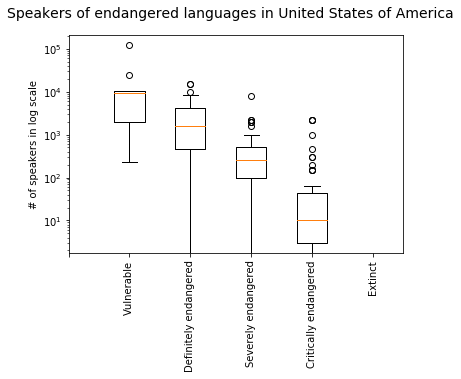

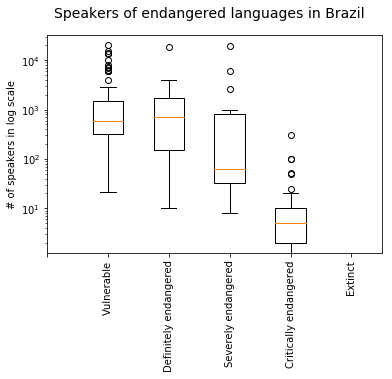

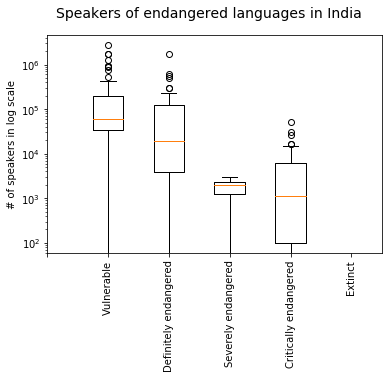

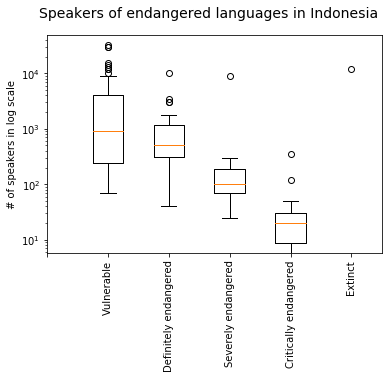

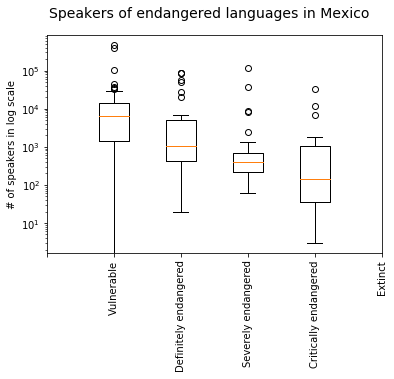

In [57]:
country_speaker_range(df, "United States of America")
country_speaker_range(df, "Brazil")
country_speaker_range(df, "India")
country_speaker_range(df, "Indonesia")
country_speaker_range(df, "Mexico")

In conclusion, I show that the number of endangerment languages across the world is very high, and rapidly progressing towards extinction, like any other non-dominant species on earth. We see that the United States is the topmost country with a large number (216) of endangered languages, followed by Brazil, India, Indonesia and Mexico. The distribution of speakers associated with each endangerment level shows that there are many critically endangered languages (80 for USA, 43 for Brazil) which are spoken by only elderly people (0-2% of the total speakers) which will soon be extinct as they die. 

The current dataset is an estimate from 2011. In the past 7 years, we probably have seen the death of these languages. If there is an updated dataset from UNESCO, one could compare the numbers to validate the trends we observed in this analysis. 